# PROJECT: TOBACCO KILLS

**Фам Тху Чанг**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
tbckills = pd.read_csv('heart_2020.csv')
tbckills.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


# Stage 2: Preliminary processing

**Step 1: Number of participants & NaN values**

**Result**: The research involves 319795 participants and contains 18 variables. There is no NaN value, which means all participants give full answers.

In [3]:
print(f'The number of participants in the research is: {tbckills.shape[0]}')
print(f'The number of variables in the research is: {tbckills.shape[1]}')


The number of participants in the research is: 319795
The number of variables in the research is: 18


In [4]:
tbckills_NaN = tbckills.isnull().sum()
tbckills_NaN

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


**Step 2: Remove 5 unnecessary/irrelevant factors**

- **Physical Health**: The number of days in the last month where the physical health has not been good
- **Mental Health**: The number of days in the last month where mental health has not been good
- **Race**: Race has little to do with health conditions, and white people account for more than 76% of the participants, so this factor is removed.
- **Diff Walking**: Walking difficulty
- **Skin Cancer**

In [5]:
# Remove colustamns PhysicalHealth and MentalHealth
tbckills.drop(['PhysicalHealth', 'MentalHealth','DiffWalking', 'SkinCancer'], axis=1, inplace = True)
tbckills.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No
1,No,20.34,No,No,Yes,Female,80 or older,White,No,Yes,Very good,7,No,No
2,No,26.58,Yes,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No
3,No,24.21,No,No,No,Female,75-79,White,No,No,Good,6,No,No
4,No,23.71,No,No,No,Female,40-44,White,No,Yes,Very good,8,No,No


In [6]:
# Study and remove column Race

tbckills_race = tbckills['Race'].value_counts().to_frame().reset_index()
tbckills_race.columns = ['Race', "Number of people"]
tbckills_race['Percentage'] = (tbckills_race['Number of people']/tbckills_race['Number of people'].sum())*100
tbckills_race

,Race,Number of people,Percentage
0,White,245212,76.677872
1,Hispanic,27446,8.582373
2,Black,22939,7.173033
3,Other,10928,3.417189
4,Asian,8068,2.522866
5,American Indian/Alaskan Native,5202,1.626667


In [7]:
tbckills.drop(['Race'], axis=1, inplace = True)
tbckills.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,Female,55-59,Yes,Yes,Very good,5,Yes,No
1,No,20.34,No,No,Yes,Female,80 or older,No,Yes,Very good,7,No,No


**Unimportant step: Rename some variables**


In [8]:

tbckills.rename(columns={"AlcoholDrinking": "Alcohol"}, inplace=True)
tbckills.head(2)

,HeartDisease,BMI,Smoking,Alcohol,Stroke,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,Female,55-59,Yes,Yes,Very good,5,Yes,No
1,No,20.34,No,No,Yes,Female,80 or older,No,Yes,Very good,7,No,No


**Step 3: Categorize the remaining 15 variables based on their fuctions**
- **Category 1 = Information (Independent variables)**
    + **BMI**: Body Mass Index indicates the level of body fatness
    + **Sex**
    + **Age**: From 25
- **Category 2 = Conditions (Independent variables)**
    + **Smoking**
    + **Alcohol**: Heavy drinker or not
    + **PhysicalActivity**: Exercises
    + **Sleeptime**: Hours of sleep per day
- **Category 3 = Consequences (Dependent variables)** 
    + **HeartDisease**: Usually deathly
    + **Stroke**: Mostly deathly, caused by poor blood flow to the brain
    + **Diabetic**: The body functions badly to turn blood sugar into energy, leaving too much blood sugar in bloodstream.
    + **GenHealth**: Health status in general
    + **KidneyDisease**: Damaged kidney
    + **Asthma**: Difficulty in breathing, causing cough, wheeze

# Stage 3: Creating new features

**Step 1**: Create a new column called "Age" from the original column AgeCategory. AgeCategory has 12 unique values indicating 12 age ranges, so now they are narrowed down to only 6 age ranges. 


In [9]:
tbckills['Age'] = tbckills['AgeCategory'].apply(lambda x: (x=='25-29' and '25-34') or 
                                  (x=='25-29' and '25-34') or
                                  (x=='35-39' and '35-44') or 
                                  (x=='40-44' and '35-44') or
                                  (x=='45-49' and '45-54') or
                                  (x=='50-49' and '45-54') or
                                  (x=='55-59' and '55-64') or
                                  (x=='60-64' and '55-64') or  
                                  (x=='65-69' and '65-79') or
                                  (x=='70-74' and '65-79') or
                                  (x=='75-79' and '65-79') or '80+')

tbckills.drop(['AgeCategory'], axis = 1, inplace = True)

tbckills.head(2)

,HeartDisease,BMI,Smoking,Alcohol,Stroke,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,Age
0,No,16.60,Yes,No,No,Female,Yes,Yes,Very good,5,Yes,No,55-64
1,No,20.34,No,No,Yes,Female,No,Yes,Very good,7,No,No,80+


**Step 2**: Create a new column called "Life Style" by combining two independent variables: PhysicalActivity and SleepTime

- If PhysicalActivity = Yes & SleepTime from 7-9 hrs => LifeStyle = Healthy +
- If PhysicalActivity = No & SleepTime from 7-9 hrs => LifeStyle = Healthy -
- If PhysicalActivity = Yes & SleepTime not from 7-9 hrs => LifeStyle = Unhealthy -
- If PhysicalActivity = No  & SleepTime not from 7-9 hrs => LifeStyle = Unhealthy +

In [10]:
# Transform values in 'SleepTime'
tbckills['SleepTime'] = tbckills['SleepTime'].astype(int)


In [11]:
# Create 'LifeStyle'
def LifeStyle(x):
    if x['PhysicalActivity'] == "Yes" and 7 <= x['SleepTime'] <= 9:
        return 'Healthy +'
    elif x['PhysicalActivity'] == "No" and 7 <= x['SleepTime'] <= 9:
        return 'Healthy -'
    elif x['PhysicalActivity'] == "Yes" and (7 > x['SleepTime'] or x['SleepTime'] > 9):
        return 'Unhealthy -'
    else:
        return 'Unhealthy +'

tbckills = tbckills.assign(LifeStyle = tbckills.apply(LifeStyle, axis = 1))

tbckills.head(10)

,HeartDisease,BMI,Smoking,Alcohol,Stroke,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,Age,LifeStyle
0,No,16.60,Yes,No,No,Female,Yes,Yes,Very good,5,Yes,No,55-64,Unhealthy -
1,No,20.34,No,No,Yes,Female,No,Yes,Very good,7,No,No,80+,Healthy +
2,No,26.58,Yes,No,No,Male,Yes,Yes,Fair,8,Yes,No,65-79,Healthy +
3,No,24.21,No,No,No,Female,No,No,Good,6,No,No,65-79,Unhealthy +
4,No,23.71,No,No,No,Female,No,Yes,Very good,8,No,No,35-44,Healthy +
5,Yes,28.87,Yes,No,No,Female,No,No,Fair,12,No,No,65-79,Unhealthy +
6,No,21.63,No,No,No,Female,No,Yes,Fair,4,Yes,No,65-79,Unhealthy -
7,No,31.64,Yes,No,No,Female,Yes,No,Good,9,Yes,No,80+,Healthy -
8,No,26.45,No,No,No,Female,"No, borderline diabetes",No,Fair,5,No,Yes,80+,Unhealthy +
9,No,40.69,No,No,No,Male,No,Yes,Good,10,No,No,65-79,Unhealthy -


# Stage 4: Intelligence Data Analysis

In [12]:
tbckills.tail(3)

,HeartDisease,BMI,Smoking,Alcohol,Stroke,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,Age,LifeStyle
319792,No,24.24,No,No,No,Female,No,Yes,Good,6,No,No,45-54,Unhealthy -
319793,No,32.81,No,No,No,Female,No,No,Good,12,No,No,25-34,Unhealthy +
319794,No,46.56,No,No,No,Female,No,Yes,Good,8,No,No,80+,Healthy +


**Step 1: Analyze variable**

**Independent variables: Category 1 = Information**

**BMI**:
- BMI < 18.5: Underweight
- BMI from 18.5 to 25.0: Healthy
- BMI from 25.0 to 30.0: Overweight
- BMI > 30.0: Obesity


In [13]:
# Grouping participants by BMI
tbckills['BMI group'] = tbckills['BMI'].apply(lambda x: (x<18.5 and 'Underweight') or 
                                  (18.5<=x<25 and 'Healthy weight') or
                                  (25<=x<30 and 'Overweight')
                                  or 'Obesity')
tbckills[['BMI', 'BMI group']].head()

,BMI,BMI group
0,16.60,Underweight
1,20.34,Healthy weight
2,26.58,Overweight
3,24.21,Healthy weight
4,23.71,Healthy weight


In [14]:
tbckills_bmig = tbckills['BMI group'].value_counts().to_frame().reset_index()
tbckills_bmig.columns = ['BMI group', 'Number of people']
tbckills_bmig['%'] = 100*(tbckills_bmig['Number of people']/tbckills_bmig['Number of people'].sum())
tbckills_bmig

,BMI group,Number of people,%
0,Overweight,114512,35.807939
1,Obesity,102842,32.158727
2,Healthy weight,97331,30.435435
3,Underweight,5110,1.597899


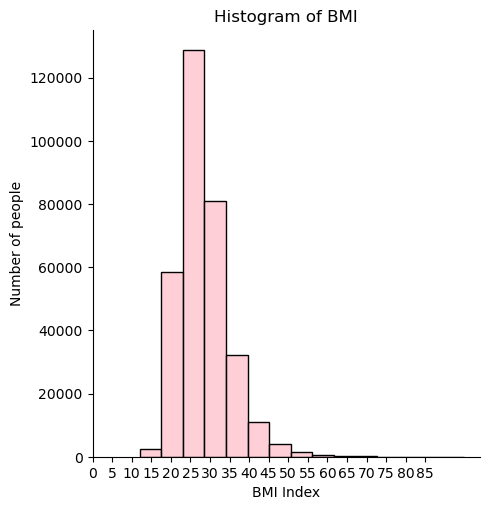

In [15]:
# Historgram of BMI

sns.displot(tbckills['BMI'],bins=15, color = 'pink')

plt.xlabel('BMI Index',)
plt.ylabel('Number of people')
plt.title('Histogram of BMI')
plt.xticks(np.arange(0, 90, step=5))

plt.show()

**Sex**: The number of participants from both genders are quite equal
- 52.47% of participants are female
- 47.53% of participants are male

In [16]:

tbckills_sex = tbckills['Sex'].value_counts().to_frame().reset_index()
tbckills_sex.columns = ['Sex', 'Number of people']
tbckills_sex['%'] = 100*(tbckills_sex['Number of people']/tbckills_sex['Number of people'].sum())
tbckills_sex

,Sex,Number of people,%
0,Female,167805,52.472678
1,Male,151990,47.527322


**Age**: 


In [17]:
# Group participants by Age
tbckills_age = tbckills['Age'].value_counts().to_frame().reset_index()
tbckills_age.columns = ['Age', 'Number of people']
tbckills_age = tbckills_age.sort_values(by=['Age'], ascending=False)
tbckills_age

,Age,Number of people
0,80+,89352
1,65-79,86698
2,55-64,63443
4,45-54,21791
3,35-44,41556
5,25-34,16955


Text(0.5, 1.0, 'Pie chart of Age groups')

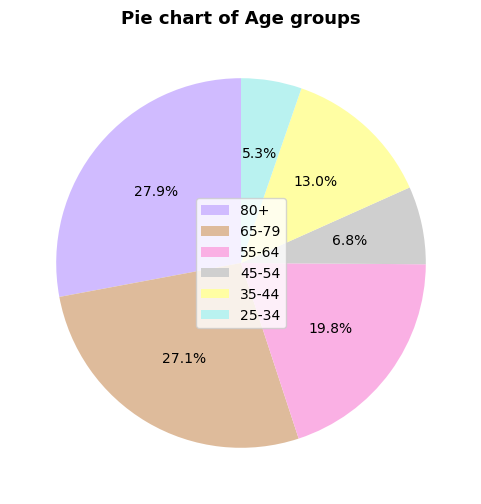

In [18]:
# Pie chart of Age groups

fig, ax = plt.subplots(1,1, figsize=(6,6))

plt.pie(tbckills_age['Number of people'], colors =  sns.color_palette('pastel')[4:10],
        autopct = '%1.1f%%', startangle = 90)

plt.legend(labels = tbckills_age['Age'], loc="center")

plt.title('Pie chart of Age groups', fontsize = 13, fontweight = 'bold')

**Comments**:
- More than half of participants are 65 years old or older. 
- Almost 1/5 of participants are from 55 to 64 years old.
- About 1/4 of participants are from 25 to 54 years old.

In [19]:
tbckills.head(3)

,HeartDisease,BMI,Smoking,Alcohol,Stroke,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,Age,LifeStyle,BMI group
0,No,16.60,Yes,No,No,Female,Yes,Yes,Very good,5,Yes,No,55-64,Unhealthy -,Underweight
1,No,20.34,No,No,Yes,Female,No,Yes,Very good,7,No,No,80+,Healthy +,Healthy weight
2,No,26.58,Yes,No,No,Male,Yes,Yes,Fair,8,Yes,No,65-79,Healthy +,Overweight


**Independent variables: Category 2 = Conditions**

**Smoking**
- People who do not smoke take up 58.72% of participants
- People who smoke take up 41.25% of participants


In [20]:
tbckills_smoke = tbckills['Smoking'].value_counts().to_frame().reset_index()
tbckills_smoke.columns = ['Smoking', 'Number of people']
tbckills_smoke['%'] = 100*(tbckills_smoke['Number of people']/tbckills_smoke['Number of people'].sum())
tbckills_smoke

,Smoking,Number of people,%
0,No,187887,58.752326
1,Yes,131908,41.247674


**Alcohol**

Heavy drinkers are men who have > 14 drinks per week and women who have > 7 drinks per week.
- The majority of participants (93.19%) are not heavy alcohol drinkers 
- Only 6.81% of participants are heavy alcohol drinkers

In [21]:
tbckills_ach = tbckills['Alcohol'].value_counts().to_frame().reset_index()
tbckills_ach.columns = ['Alcohol', 'Number of people']
tbckills_ach['%'] = 100*(tbckills_ach['Number of people']/tbckills_ach['Number of people'].sum())
tbckills_ach

,Alcohol,Number of people,%
0,No,298018,93.190325
1,Yes,21777,6.809675


**Life Style = Physical Activity + Sleep Time**

- More than half of participants have a healthy lifestyle
- Only 9.77% of participants have an unhealthy (+) lifestyle, which means they neither do exercise nor have adequate sleep

In [22]:
# Group participants by 'Life Style'
tbckills_ls = tbckills['LifeStyle'].value_counts().to_frame().reset_index()
tbckills_ls.columns = ['Life Style', 'Number of people']
tbckills_ls['%'] = 100*(tbckills_ls['Number of people']/tbckills_ls['Number of people'].sum())
tbckills_ls = tbckills_ls.sort_values(by=['Life Style'], ascending=False)
tbckills_ls

,Life Style,Number of people,%
1,Unhealthy -,77155,24.126393
3,Unhealthy +,31246,9.770634
2,Healthy -,40592,12.693132
0,Healthy +,170802,53.409841


Text(0.5, 1.0, 'Number of people')

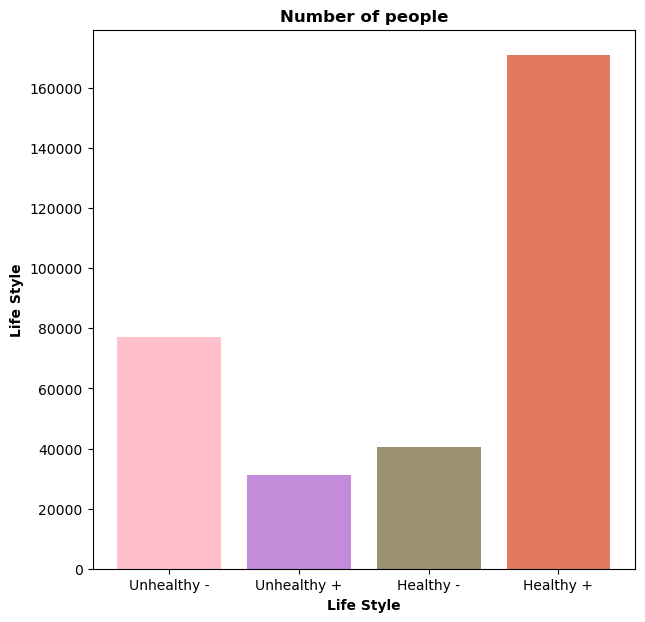

In [23]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.bar(tbckills_ls['Life Style'], tbckills_ls['Number of people'], color = ('pink', '#c28cdb', '#9c906e','#e37a5f'))

ax.set_ylabel('Life Style', fontweight = 'bold', fontsize = 10)
ax.set_xlabel('Life Style', fontweight = 'bold', fontsize = 10)

ax.set_title('Number of people', fontweight = 'bold', fontsize = 12)

In [24]:
tbckills.head(3)

,HeartDisease,BMI,Smoking,Alcohol,Stroke,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,Age,LifeStyle,BMI group
0,No,16.60,Yes,No,No,Female,Yes,Yes,Very good,5,Yes,No,55-64,Unhealthy -,Underweight
1,No,20.34,No,No,Yes,Female,No,Yes,Very good,7,No,No,80+,Healthy +,Healthy weight
2,No,26.58,Yes,No,No,Male,Yes,Yes,Fair,8,Yes,No,65-79,Healthy +,Overweight


**Dependent variables: Category 3 = Consequences**
- **HeartDisease**: Usually deathly
- **Stroke**: Mostly deathly, caused by poor blood flow to the brain
- **Diabetic**: The body functions badly to turn blood sugar into energy, leaving too much blood sugar in bloodstream.
- **GenHealth**: Health status in general
- **KidneyDisease**: Damaged kidney
- **Asthma**: Difficulty in breathing, causing cough, wheeze

**Heart Disease**

In [25]:
tbckills_heartdisease = tbckills['HeartDisease'].value_counts().to_frame().reset_index()
tbckills_heartdisease.columns = ['Heart Disease', 'Number of people']
tbckills_heartdisease['%'] = 100*(tbckills_heartdisease['Number of people']/tbckills_heartdisease['Number of people'].sum())
tbckills_heartdisease

,Heart Disease,Number of people,%
0,No,292422,91.440454
1,Yes,27373,8.559546


**Stroke**

In [26]:

tbckills_stroke = tbckills['Stroke'].value_counts().to_frame().reset_index()
tbckills_stroke.columns = ['Stroke', 'Number of people']
tbckills_stroke['%'] = 100*(tbckills_stroke['Number of people']/tbckills_stroke['Number of people'].sum())
tbckills_stroke

,Stroke,Number of people,%
0,No,307726,96.22602
1,Yes,12069,3.77398


**Diabetes**

In [27]:
tbckills['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

- Because this study focuses on health problems caused by bad habits such as smoking, **people who have diabete during pregnancy are considered to NOT have diabetes** because they wouldn't smoke. So the number of people who have diabete during pregnancy is added to the 'No' value.
- Borderline diabetes are prediabetes

In [28]:

tbckills_diabetic = tbckills['Diabetic'].value_counts().to_frame().reset_index()
tbckills_diabetic.columns = ['Diabetic', 'Number of people']

# No = Sum(No + Yes(during pregnancy))
tbckills_diabetic.loc[tbckills_diabetic.Diabetic == "No", "Number of people"] = tbckills_diabetic['Number of people'].iloc[0] + tbckills_diabetic['Number of people'].iloc[3] 

#Delete row "Yes (during pregnancy)"
tbckills_diabetic.drop(labels = 3, axis = 0, inplace = True)

#Change the name "No, borderline diabetes" to "Prediabetes" for easier understanding
tbckills_diabetic['Diabetic'] = tbckills_diabetic['Diabetic'].replace({"No, borderline diabetes":"Prediabetes"})

#Percentage
tbckills_diabetic['%'] = 100*(tbckills_diabetic['Number of people']/tbckills_diabetic['Number of people'].sum())

tbckills_diabetic

,Diabetic,Number of people,%
0,No,272212,85.120781
1,Yes,40802,12.758799
2,Prediabetes,6781,2.120421


**Health status in general**

In [29]:
tbckills['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [30]:
tbckills_gen = tbckills['GenHealth'].value_counts().to_frame().reset_index()
tbckills_gen.columns = ['General Health', 'Number of people']

tbckills_gen


,General Health,Number of people
0,Very good,113858
1,Good,93129
2,Excellent,66842
3,Fair,34677
4,Poor,11289


Ranking general health status:
- 5 = Excellent
- 4 = Very good
- 3 = Good
- 2 = Fair
- 1 = Poor

In [31]:
tbckills_gen['General Health'].replace({'Excellent':'5', 'Very good':'4', 'Good':'3', 
                                        'Fair':'2', 'Poor':'1'}, inplace=True)

tbckills_gen = tbckills_gen.sort_values(by=['General Health'], ascending=True)
tbckills_gen

,General Health,Number of people
4,1,11289
3,2,34677
1,3,93129
0,4,113858
2,5,66842


**Kidney Disease**

In [32]:
tbckills_kidney = tbckills['KidneyDisease'].value_counts().to_frame().reset_index()
tbckills_kidney.columns = ['Kidney Disease', 'Number of people']
tbckills_kidney['%'] = 100*(tbckills_kidney['Number of people']/tbckills_kidney['Number of people'].sum())
tbckills_kidney

,Kidney Disease,Number of people,%
0,No,308016,96.316703
1,Yes,11779,3.683297


In [33]:
tbckills.head(5)

,HeartDisease,BMI,Smoking,Alcohol,Stroke,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,Age,LifeStyle,BMI group
0,No,16.60,Yes,No,No,Female,Yes,Yes,Very good,5,Yes,No,55-64,Unhealthy -,Underweight
1,No,20.34,No,No,Yes,Female,No,Yes,Very good,7,No,No,80+,Healthy +,Healthy weight
2,No,26.58,Yes,No,No,Male,Yes,Yes,Fair,8,Yes,No,65-79,Healthy +,Overweight
3,No,24.21,No,No,No,Female,No,No,Good,6,No,No,65-79,Unhealthy +,Healthy weight
4,No,23.71,No,No,No,Female,No,Yes,Very good,8,No,No,35-44,Healthy +,Healthy weight


**Step 2: Correlations**

Dropping PhysicalActivity, BMI group

In [34]:
tbckills_corr = tbckills[['Age','BMI', 'Sex','Smoking','Alcohol','SleepTime','LifeStyle', 'HeartDisease','Stroke',
                         'Diabetic','GenHealth','KidneyDisease', 'Asthma']]
tbckills_corr.head()

,Age,BMI,Sex,Smoking,Alcohol,SleepTime,LifeStyle,HeartDisease,Stroke,Diabetic,GenHealth,KidneyDisease,Asthma
0,55-64,16.60,Female,Yes,No,5,Unhealthy -,No,No,Yes,Very good,No,Yes
1,80+,20.34,Female,No,No,7,Healthy +,No,Yes,No,Very good,No,No
2,65-79,26.58,Male,Yes,No,8,Healthy +,No,No,Yes,Fair,No,Yes
3,65-79,24.21,Female,No,No,6,Unhealthy +,No,No,No,Good,No,No
4,35-44,23.71,Female,No,No,8,Healthy +,No,No,No,Very good,No,No


Numeralizing categorical variables

In [35]:
pd.set_option('chained',None)

In [36]:
yes_no_cols = ['Smoking','Alcohol', 'HeartDisease','Stroke','KidneyDisease','Asthma']
yes_no = {'Yes':1, 'No':0}

for i in range(len(yes_no_cols)):
    column = yes_no_cols[i]
    tbckills_corr[column].replace(yes_no, inplace = True)
    
tbckills_corr.head(3)

,Age,BMI,Sex,Smoking,Alcohol,SleepTime,LifeStyle,HeartDisease,Stroke,Diabetic,GenHealth,KidneyDisease,Asthma
0,55-64,16.60,Female,1,0,5,Unhealthy -,0,0,Yes,Very good,0,1
1,80+,20.34,Female,0,0,7,Healthy +,0,1,No,Very good,0,0
2,65-79,26.58,Male,1,0,8,Healthy +,0,0,Yes,Fair,0,1


In [37]:
conditions_GenHealth = {'Excellent':5, 'Very good':4, 'Good':3,'Fair':2, 'Poor':1}
conditions_Age = {'80+':6, '65-79':5, '55-64':4,'45-54':3, '35-44':2, '25-34':1 }
conditions_Sex =  {'Male':1, 'Female':0}
conditions_Diabetic  = {'Yes': 2, 'No, borderline diabetes': 1, 'No': 0, 'Yes (during pregnancy)': 0}
conditions_LifeStyle = {'Unhealthy -': 2, 'Unhealthy +': 1, 'Healthy +': 4, 'Healthy -':3}

cols = ['GenHealth', 'Age', 'Sex', 'Diabetic', 'LifeStyle']
conditions = [conditions_GenHealth, conditions_Age, conditions_Sex, conditions_Diabetic, conditions_LifeStyle ]

for i in range(len(cols)):
    col = cols[i]
    condition = conditions[i]
    tbckills_corr[col].replace(condition, inplace = True)

tbckills_corr.head(3)



,Age,BMI,Sex,Smoking,Alcohol,SleepTime,LifeStyle,HeartDisease,Stroke,Diabetic,GenHealth,KidneyDisease,Asthma
0,4,16.60,0,1,0,5,2,0,0,2,4,0,1
1,6,20.34,0,0,0,7,4,0,1,0,4,0,0
2,5,26.58,1,1,0,8,4,0,0,2,2,0,1


In [38]:
for col in list(tbckills_corr.columns):
    tbckills_corr[col] = tbckills_corr[col].astype(int)

In [39]:
correlation = tbckills_corr.corr()
correlation

,Age,BMI,Sex,Smoking,Alcohol,SleepTime,LifeStyle,HeartDisease,Stroke,Diabetic,GenHealth,KidneyDisease,Asthma
Age,1.000000,-0.067122,-0.020086,-0.007067,-0.040977,0.076808,0.014859,0.111750,0.062786,0.085507,-0.073393,0.055458,-0.021325
BMI,-0.067122,1.000000,0.027203,0.023216,-0.038646,-0.051663,-0.139085,0.051628,0.019840,0.211452,-0.230434,0.050792,0.092211
Sex,-0.020086,0.027203,1.000000,0.085052,0.004200,-0.015704,0.019096,0.070040,-0.003091,0.019574,0.025947,-0.009084,-0.069191
Smoking,-0.007067,0.023216,0.085052,1.000000,0.111768,-0.030336,-0.104355,0.107764,0.061226,0.059318,-0.174717,0.034920,0.024149
Alcohol,-0.040977,-0.038646,0.004200,0.111768,1.000000,-0.005065,-0.001715,-0.032080,-0.019858,-0.059313,0.029780,-0.028280,-0.002202
SleepTime,0.076808,-0.051663,-0.015704,-0.030336,-0.005065,1.000000,0.443540,0.008327,0.011900,0.005100,0.063071,0.006238,-0.048245
LifeStyle,0.014859,-0.139085,0.019096,-0.104355,-0.001715,0.443540,1.000000,-0.074470,-0.064550,-0.105880,0.261051,-0.061307,-0.075911
HeartDisease,0.111750,0.051628,0.070040,0.107764,-0.032080,0.008327,-0.074470,1.000000,0.196835,0.184519,-0.243182,0.145197,0.041444
Stroke,0.062786,0.019840,-0.003091,0.061226,-0.019858,0.011900,-0.064550,0.196835,1.000000,0.109603,-0.168090,0.091167,0.038866
Diabetic,0.085507,0.211452,0.019574,0.059318,-0.059313,0.005100,-0.105880,0.184519,0.109603,1.000000,-0.284155,0.153639,0.047653


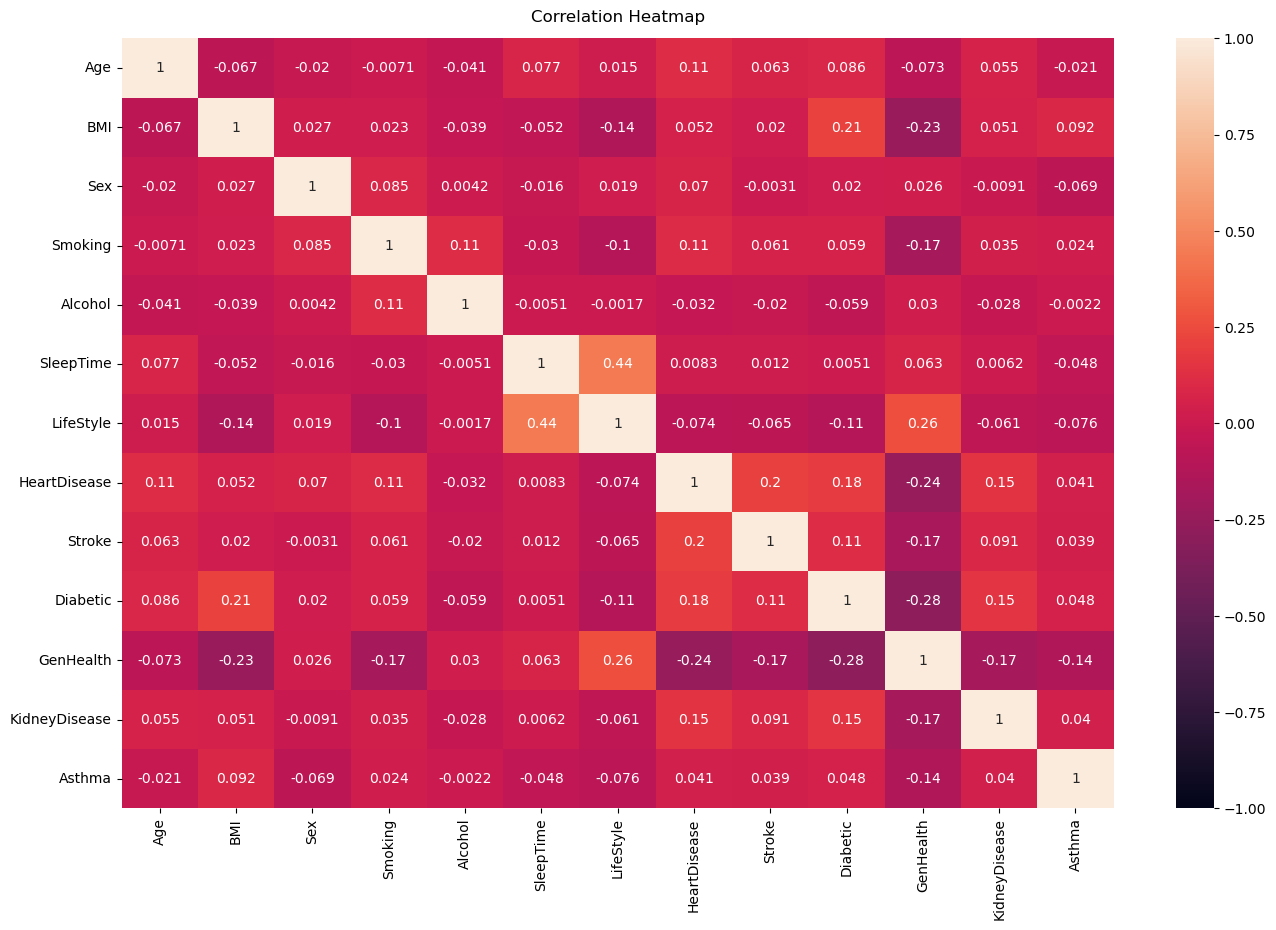

In [40]:
plt.figure(figsize=(16, 10))

heatmap = sns.heatmap(tbckills_corr.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Results:**
Using the correlation matrix, it can be seen that there is **no significant correlations** between the variables being studied (Except for the correlation coefficient of 0.44 between Sleep Time and Life Style, but this is because Life Style is built upon Sleep Time)

- **Life Style and General Health** are slight positively correlated with a coefficient of +0.26, which means the higher quality of life style, the better one's general health, to a certain extent.
- **BMI and Diabeti**c are slight positively correlated with a coefficient of +0.21, which is easy to understand since the higher the BMI, the higher risk of having obesity and hence, the higher risk of have diabetes.
- **BMI and General Health** are slight negatively correlated with a coefficient of -0.23. However, whereas it is common knowledge that high BMI indicates high body fatness, which is not good for one's general health, it does not necessarily mean that a low BMI would lead to low index of general health.
- **Heart Disease and Stroke** are slightly positively correlated with a coefficient of +0.2
- **Heart Disease, Kidney Disease and Diabetic** all share very slight correlations with each other.

In general, these figures can be used to propose hypotheses for further studies, but do not give specific answers because the correlations received are weak. It would be more precise to use Pearson correlation if the dependent variables of the chosen dataset were continuous ones, for example, the number of strokes or indices of specific cardiovascular illnesses. However, since 7/8 of our dependent variables are binary, the received results aren't enough to draw concrete conclusions just yet. 

# Stage 5: Visualization

**Visualization 1**: Box and whisker plot of **BMI and Heart Disease**


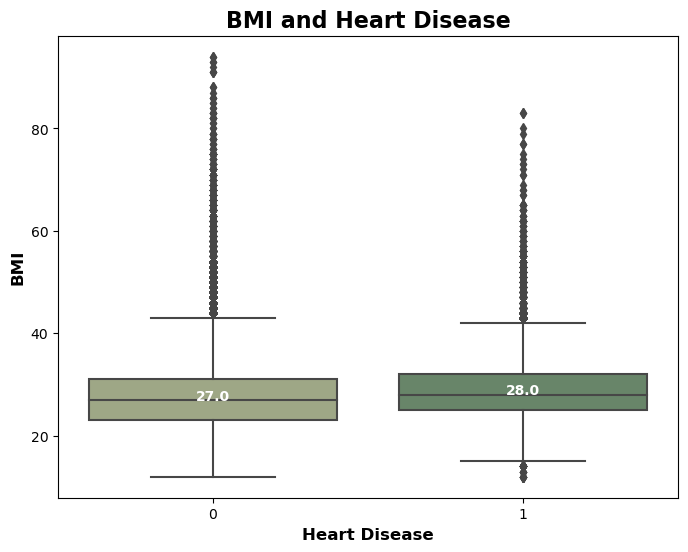

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

BMI_HD = sns.boxplot(x='HeartDisease', y='BMI', 
                     data=tbckills_corr,
                     palette = ['#a1ad80', '#638a65'],
                     width=0.8)


BMI_HD.axes.set_title("BMI and Heart Disease", fontsize=16, fontweight = 'bold')
BMI_HD.set_xlabel("Heart Disease", fontsize=12, fontweight = 'bold')
BMI_HD.set_ylabel("BMI", fontsize=12, fontweight = 'bold')

medians1 = tbckills_corr.groupby(['HeartDisease'])['BMI'].median()
vertical_offset1 = tbckills_corr['HeartDisease'].median() * 0.05

for xtick in BMI_HD.get_xticks():
    BMI_HD.text(xtick,medians1[xtick] + vertical_offset1,medians1[xtick], 
            horizontalalignment='center',size='medium',color='white',weight='semibold')

**Comments**:
 - In our dataset, BMI of people who 'ARE DIAGNOSED' with heart disease are **sligtly higher** than those of people who 'ARE NOT DIAGNOSED' with heart disease:
    + Half the number of participants who ARE NOT DIAGNOSED with heart disease have a BMI of 27.26
    + Half the number of participants who ARE DIAGNOSED with heart disease have a BMI of 28.34
 - Result: In general, people who have heart disease may have a higher BMI than those who do not have heart disease.
 - Hypothesis: **Higher BMI (which means higher body fat) might cause higher risk of Heart Disease**.

**Visualization 2**: Box and whisker plot of **BMI and Diabetic**

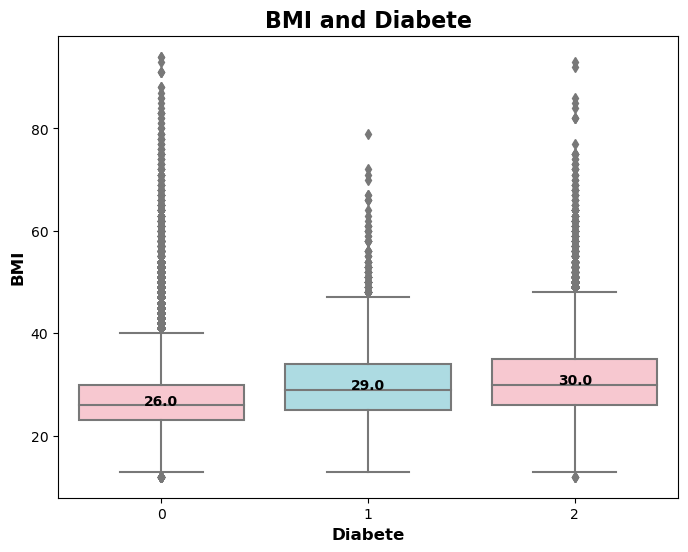

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

BMI_Db = sns.boxplot(x='Diabetic', y='BMI', 
                     palette = ['pink', '#a4e2eb'],
                     width=0.8,
                     data=tbckills_corr)

BMI_Db.axes.set_title("BMI and Diabete", fontsize=16, fontweight = 'bold')
BMI_Db.set_xlabel("Diabete", fontsize=12, fontweight = 'bold')
BMI_Db.set_ylabel("BMI", fontsize=12, fontweight = 'bold')

medians2 = tbckills_corr.groupby(['Diabetic'])['BMI'].median()
vertical_offset2 = tbckills_corr['Diabetic'].median() * 0.05

for xtick in BMI_Db.get_xticks():
    BMI_Db.text(xtick, medians2[xtick] + vertical_offset2, medians2[xtick], 
            horizontalalignment='center',size='medium',color='black',weight='semibold')

**Comments**:
 - In our dataset, BMI of people who 'ARE DIAGNOSED' with diabete are **significantly higher** than those of people who 'ARE NOT DIAGNOSED' with diabete:
    + Half the number of participants who ARE NOT DIAGNOSED with diabete have a BMI of 26.63
    + Half the number of participants who ARE DIAGNOSED with diabete have a BMI of 30.41
 - Result: In general, people who have diabete have a higher BMI than those who do not have diabete.  
 - Hypothesis: **Higher BMI (which means higher body fat) means higher risk of Diabete**

**Visualization 3**: Box and whisker plot of **BMI and General Health**


Text(0, 0.5, 'BMI')

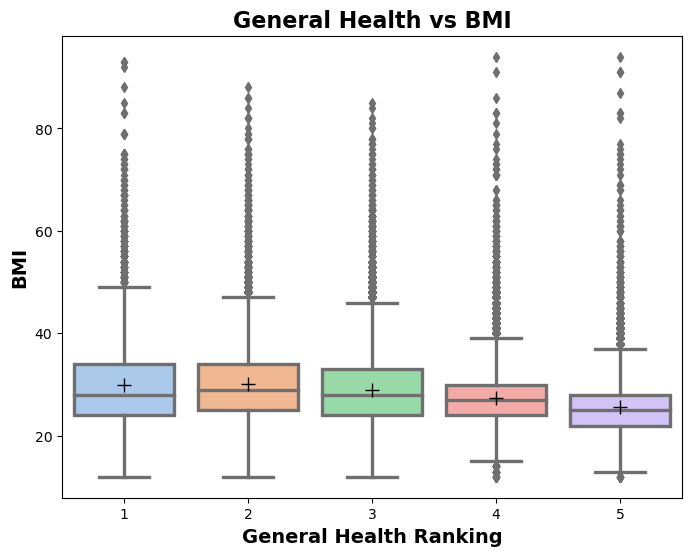

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel")

BMI_GenH = sns.boxplot(x='GenHealth', y='BMI', 
                       data=tbckills_corr, 
                       palette=colors, 
                       showmeans=True,
                       meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"}, 
                       width=0.8,
                       linewidth=2.4)

BMI_GenH.axes.set_title("General Health vs BMI", fontsize=16, fontweight = 'bold')
BMI_GenH.set_xlabel("General Health Ranking", fontsize=14, fontweight = 'bold')
BMI_GenH.set_ylabel("BMI", fontsize=14, fontweight = 'bold')

**Comments**:
 - In our dataset: BMI of participants experience downward trend as the level of General Health go up.
 - Result: In general, people who have a high level of general health have a lower BMI than the others.
 - Hypothesis: **Lower BMI (which means lower body fat) means higher level of general health**

**Visualization 4**: Box and whisker plot of **BMI, Sex, Heart Disease and Diabetic**



In [44]:
# Create a new dataframe
boxplot_mix = tbckills_corr[['BMI', 'HeartDisease', 'Diabetic', 'Sex', 'Age']]

# Choose only participants who say Yes to Heart Disease or/and Diabete
# Create a new column combining Heart Disease + Diabetic
def Disease(x):
    if x['HeartDisease'] == 1 and x['Diabetic'] == 0:
        return 'Heart'
    elif x['Diabetic'] == 1 and x['HeartDisease'] == 0:
        return 'Diabete'
    elif x['HeartDisease'] == 1 and x['Diabetic'] == 1:
        return 'Both'
    else:
        return 'None'

boxplot_mix = boxplot_mix.assign(Illness = boxplot_mix.apply(Disease, axis = 1))

# Delete participants who say No to both Heart Disease and Diabete
boxplot_mix.drop(boxplot_mix[boxplot_mix.Illness == 'None'].index, inplace=True)

boxplot_mix.head(10)

,BMI,HeartDisease,Diabetic,Sex,Age,Illness
5,28,1,0,0,5,Heart
8,26,0,1,0,6,Diabete
17,22,0,1,1,5,Diabete
20,21,0,1,0,6,Diabete
44,30,0,1,1,4,Diabete
45,20,1,0,0,5,Heart
77,34,1,0,0,4,Heart
100,24,0,1,0,6,Diabete
101,24,1,0,1,5,Heart
105,58,0,1,1,5,Diabete


In [45]:
# Transfrom values in Sex
boxplot_mix['Sex'] = boxplot_mix['Sex'].apply(lambda x: (x == 1 and 'Male') or 'Female')


Text(0.5, 1.0, 'Box and Whisker: Comparison of Male and Female for different types of illnesses based on BMI')

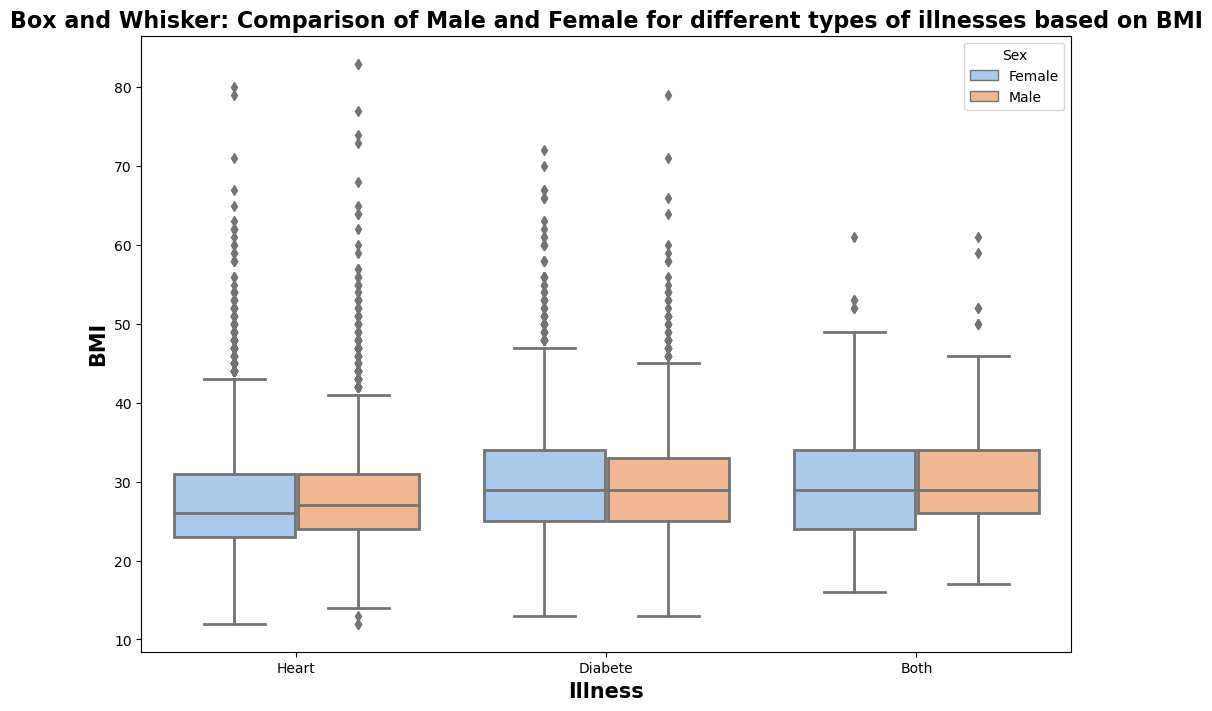

In [46]:
# Build the plot
fig, ax = plt.subplots(figsize=(12, 8))

bp1 = sns.boxplot(x="Illness", y="BMI",
            hue = 'Sex', 
            palette= sns.color_palette("pastel"),
            data=boxplot_mix,
            linewidth=2)

bp1.set_xlabel("Illness", fontsize = 15, fontweight = 'bold')
bp1.set_ylabel("BMI", fontsize = 15, fontweight = 'bold')
bp1.axes.set_title("Box and Whisker: Comparison of Male and Female for different types of illnesses based on BMI", fontsize=16, fontweight = 'bold')




**Comments**:
- Result: On average, there is **no significant difference** between BMI index of men and women for diabete, heart disease or both.

- Hypothesis: **Heart disease or/and Diabete can be diagnosed for any gender**

**Visualization 5**: Box and whisker plot of **BMI, Age, Heart Disease and Diabetic**

In [47]:
# Transfrom values in Age

boxplot_mix['Age'].replace({6:'80+', 5:'65-79', 4:'55-64', 
                            3:'45-54', 2:'35-44', 1:'25-34'}, inplace=True)
boxplot_mix.head(5)


,BMI,HeartDisease,Diabetic,Sex,Age,Illness
5,28,1,0,Female,65-79,Heart
8,26,0,1,Female,80+,Diabete
17,22,0,1,Male,65-79,Diabete
20,21,0,1,Female,80+,Diabete
44,30,0,1,Male,55-64,Diabete


Text(0.5, 1.0, 'Box and Whisker: Comparison between age groups for different types of illnesses based on BMI')

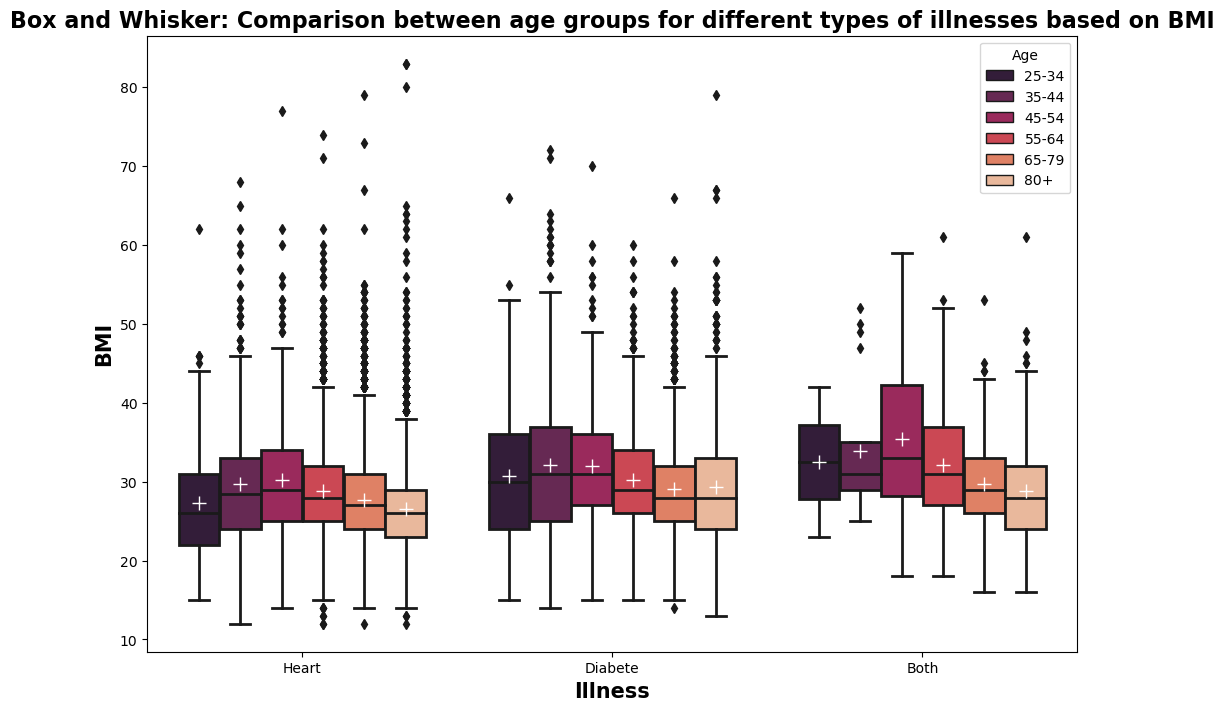

In [48]:

fig, ax = plt.subplots(figsize=(12, 8))

order2 = ['25-34', '35-44', '45-54', '55-64', '65-79', '80+']

bp2 = sns.boxplot(x="Illness", y="BMI",
            hue = 'Age',
            hue_order = order2,
            palette=sns.color_palette("rocket"),
            showmeans=True,
            meanprops={"marker": "+", "markeredgecolor": "white","markersize": "10"},
            data=boxplot_mix,
            linewidth=2)

bp2.set_xlabel("Illness", fontsize = 15, fontweight = 'bold')
bp2.set_ylabel("BMI", fontsize = 15, fontweight = 'bold')
bp2.axes.set_title("Box and Whisker: Comparison between age groups for different types of illnesses based on BMI", fontsize=16, fontweight = 'bold')



**Comments**:
- Result: On average, all participants who have diabete and/or heart disease have their BMI > 25, which means most of them are overweight and/or obese. The younger half of participants (25-54 years old) have more BMI (body fat) than the older half.
- Hypothesis: **Heart disease or/and Diabete can be diagnosed at any age, but young people are more likely to have diabete(s)**

**Visualization 6**: Grouped bar chart of Heart Disease, Diabetic, Kidney Disease, Stroke to compare between Male & Female

**Step 1**: Count values. (For example: male_heart = the number of 'male' participants who have heart disease)

**Step 2**: Create a dataframe of necessary variables

**Step 3**: Export into Excel for better visualization

**Step 4**: Excel

In [49]:
# Step 1
male_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.Sex ==1)].shape[0]
male_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.Sex ==1)].shape[0]
male_kidney = tbckills_corr[(tbckills_corr.KidneyDisease == 1) & (tbckills_corr.Sex ==1)].shape[0]
male_stroke = tbckills_corr[(tbckills_corr.Stroke == 1) & (tbckills_corr.Sex ==1)].shape[0]

female_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.Sex == 0)].shape[0]
female_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.Sex == 0)].shape[0]
female_kidney = tbckills_corr[(tbckills_corr.KidneyDisease == 1) & (tbckills_corr.Sex == 0)].shape[0]
female_stroke = tbckills_corr[(tbckills_corr.Stroke == 1) & (tbckills_corr.Sex == 0)].shape[0]


In [50]:
# Step 2

cols6 = {'Male': [male_heart, male_kidney, male_db, male_stroke],
         'Female': [female_heart, female_kidney, female_db, female_stroke]}
    
vs6 = pd.DataFrame(cols6, index = ['Heart', 'Kidney', 'Diabete', 'Stroke'])
vs6


,Male,Female
Heart,16139,11234
Kidney,5325,6454
Diabete,3124,3657
Stroke,5642,6427


In [51]:
# Step 3

from pandas import ExcelWriter
writer6 = ExcelWriter('Фам_Visualization6.xlsx')
vs6.to_excel(writer6, encoding='utf8', index = True)
writer6.save()



C:\Users\thutr\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
C:\Users\thutr\AppData\Local\Temp\ipykernel_19948\417226908.py:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer6.save()


In [52]:
# Step 4

from IPython.display import Image
  
Image(url="Vs6.png", width=600, height=600)

**Comments**:
- Disclaimer: The original dataset contain a quite equal number of men and women(which is good)
- Result: 
    + Stroke, Diabete, Kidney: The difference in the number of women and men that are diagnosed with these diseases is not significant.
    + Heart: More men have heart disease than women.
- Hypothesis: **Heart disease might more easily happen to men than to women**

**Visualization 7**: Grouped bar chart of **Heart Disease, Diabetic** to compare between **BMI groups**

**Step 1**: Create BMI groups from BMI + Count values. (For example: weightu_heart = the number of 'underweight' participants who have heart disease)

**Step 2**: Create a dataframe of necessary variables

**Step 3**: Export into Excel for better visualization

**Step 4**: Excel

In [53]:
# Step 1
tbckills_corr['BMIGroup'] = tbckills_corr['BMI'].apply(lambda x: (x<18.5 and 'Underweight') or 
                                  (18.5<=x<25 and 'Healthy weight') or
                                  (25<=x<30 and 'Overweight')
                                  or 'Obesity')
tbckills_corr[['BMI', 'BMIGroup']].head(4)

,BMI,BMIGroup
0,16,Underweight
1,20,Healthy weight
2,26,Overweight
3,24,Healthy weight


In [54]:
tbckills_corr.groupby

<bound method DataFrame.groupby of         Age  BMI  Sex  Smoking  Alcohol  SleepTime  LifeStyle  HeartDisease  \
0         4   16    0        1        0          5          2             0   
1         6   20    0        0        0          7          4             0   
2         5   26    1        1        0          8          4             0   
3         5   24    0        0        0          6          1             0   
4         2   23    0        0        0          8          4             0   
...     ...  ...  ...      ...      ...        ...        ...           ...   
319790    4   27    1        1        0          6          1             1   
319791    2   29    1        1        0          5          2             0   
319792    3   24    0        0        0          6          2             0   
319793    1   32    0        0        0         12          1             0   
319794    6   46    0        0        0          8          4             0   

        Stroke  

In [55]:
# Step 1

weightu_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.BMIGroup == 'Underweight')].shape[0]
weightu_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.BMIGroup == 'Underweight')].shape[0]

weighth_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.BMIGroup == 'Healthy weight')].shape[0]
weighth_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.BMIGroup == 'Healthy weight')].shape[0]

weighto_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.BMIGroup == 'Overweight')].shape[0]
weighto_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.BMIGroup == 'Overweight')].shape[0]

obs_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.BMIGroup == 'Obesity')].shape[0]
obs_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.BMIGroup == 'Obesity')].shape[0]

In [56]:
# Step 2

cols7 = {'Underweight': [weightu_heart, weightu_db],
         'Healthy weight': [weighth_heart, weighth_db],
         'Overweight': [weighto_heart, weighto_db],
         'Obesity': [obs_heart, obs_db]}
    
vs7 = pd.DataFrame(cols7, index = ['Heart', 'Diabete'])
vs7

,Underweight,Healthy weight,Overweight,Obesity
Heart,554,6156,9991,10672
Diabete,108,1302,2212,3159


In [57]:
# Step 3

from pandas import ExcelWriter
writer7 = ExcelWriter('Фам_Visualization7.xlsx')
vs7.to_excel(writer7, encoding='utf8', index = True)
writer7.save()



C:\Users\thutr\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
C:\Users\thutr\AppData\Local\Temp\ipykernel_19948\3483732696.py:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer7.save()


In [58]:
# Step 4

from IPython.display import Image
  
Image(url="Vs7.png", width=500, height=500)

**Comments**:
- Result: 
    + Diabete: (1) In the original dataset, the number of ppl who have obesity are lesst than that of ppl who are overweight. However, when it comes to Diabete, the number of obese people surge up, significantly higher than any other BMI group. (2) In the original dataset, the amount of overweight, obese, healthy people are quite qual. However, with diabete, it is clear that the number of obese and overweight people are much more.
    + Heart: The obese and overweight groups are still larger in number compared to the healthy group.
- Hypothesis: 
     + **Diabete and Heart Disease can occur to all types of BMI groups including ones with healthy weight, but very rare to underweight ones**
     + **People in the overweight and obesity ranages are more likely to have diabete and/or heart disease**

**Visualization 8**: Grouped bar chart of **Heart Disease, Diabetic** to compare between **Smokers and Non-smokers**

**Step 1**: Count values. (For example: smoke_heart = the number of participants who smoke and have heart disease)

**Step 2**: Create a dataframe of necessary variables

**Step 3**: Export into Excel for better visualization

**Step 4**: Excel

In [59]:
# Step 1

smoke_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.Smoking ==1)].shape[0]
smoke_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.Smoking ==1)].shape[0]
smoke_kidney = tbckills_corr[(tbckills_corr.KidneyDisease == 1) & (tbckills_corr.Smoking ==1)].shape[0]
smoke_stroke = tbckills_corr[(tbckills_corr.Stroke == 1) & (tbckills_corr.Smoking ==1)].shape[0]
smoke_asthma = tbckills_corr[(tbckills_corr.Asthma == 1) & (tbckills_corr.Smoking ==1)].shape[0]

nosmoke_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.Smoking == 0)].shape[0]
nosmoke_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.Smoking == 0)].shape[0]
nosmoke_kidney = tbckills_corr[(tbckills_corr.KidneyDisease == 1) & (tbckills_corr.Smoking == 0)].shape[0]
nosmoke_stroke = tbckills_corr[(tbckills_corr.Stroke == 1) & (tbckills_corr.Smoking == 0)].shape[0]
nosmoke_asthma = tbckills_corr[(tbckills_corr.Asthma == 1) & (tbckills_corr.Smoking == 0)].shape[0]

In [60]:
# Step 2

cols8 = {'Smokers': [smoke_heart, smoke_kidney, smoke_db, smoke_stroke, smoke_asthma],
         'Non-smokers': [nosmoke_heart, nosmoke_kidney, nosmoke_db, nosmoke_stroke, nosmoke_asthma]}

vs8 = pd.DataFrame(cols8, index = ['Heart', 'Kidney', 'Diabete', 'Stroke', 'Asthma'])
vs8

,Smokers,Non-smokers
Heart,16037,11336
Kidney,5894,5885
Diabete,2959,3822
Stroke,6815,5254
Asthma,18979,23893


In [61]:
# Step 3

from pandas import ExcelWriter
writer8 = ExcelWriter('Фам_Visualization8.xlsx')
vs8.to_excel(writer8, encoding='utf8', index = True)
writer8.save()



C:\Users\thutr\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
C:\Users\thutr\AppData\Local\Temp\ipykernel_19948\895372933.py:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer8.save()


In [62]:
# Step 4

from IPython.display import Image
  
Image(url="Vs8.png", width=600, height=600)

**Comments**:
- Results:
    + Heart: The number of smokers are moderately higher than non-smokers.
    + Asthma: Surprising, ppl who have asthma are more non-smokers than smokers. However, it is important to know that non-smokers can also be passive smokers (who smell the smokes), and it is more dangerous to be passive smokers than active smokers.
    + There are no significant differences in the number of smokers and non-smokers for ppl who have kidney disease, stroke or diabete
- Hypotheses: **Smoking DOES affect heart and leads to heart disease(s)**

**Visualization 9**: Grouped bar chart of **Heart Disease, Diabetic** to compare between **Age groups**

**Step 1**: Create Age groups from Age. Count values. (For example: age1_heart = the number of participants who are from 25 - 34 years old and have heart disease)
- 25-34: 1
- 35-44: 2
- 45-54: 3
- 55-64: 4
- 65-79: 5
- 80+: 6

**Step 2**: Create a dataframe of necessary variables

**Step 3**: Export into Excel for better visualization

**Step 4**: Excel

In [63]:
# Step 1

age1_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.Age == 1)].shape[0]
age1_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.Age == 1)].shape[0]

age2_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.Age == 2)].shape[0]
age2_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.Age == 2)].shape[0]

age3_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.Age == 3)].shape[0]
age3_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.Age == 3)].shape[0]

age4_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.Age == 4)].shape[0]
age4_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.Age == 4)].shape[0]

age5_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.Age == 5)].shape[0]
age5_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.Age == 5)].shape[0]

age6_heart = tbckills_corr[(tbckills_corr.HeartDisease == 1) & (tbckills_corr.Age == 6)].shape[0]
age6_db = tbckills_corr[(tbckills_corr.Diabetic == 1) & (tbckills_corr.Age == 6)].shape[0]


In [64]:
# Step 2

cols9 = {'25-34': [age1_heart, age1_db],
         '35-44': [age2_heart, age2_db],
         '45-54': [age3_heart, age3_db],
         '55-64': [age4_heart, age4_db],
         '65-79': [age5_heart, age5_db],
         '80+': [age6_heart, age6_db]}

vs9 = pd.DataFrame(cols9, index = ['Heart', 'Diabete'])
vs9

,25-34,35-44,45-54,55-64,65-79,80+
Heart,133,782,744,5529,12997,7188
Diabete,175,573,398,1615,2424,1596


In [65]:
# Step 3

from pandas import ExcelWriter
writer9 = ExcelWriter('Фам_Visualization9.xlsx')
vs9.to_excel(writer9, encoding='utf8', index = True)
writer9.save()



C:\Users\thutr\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
C:\Users\thutr\AppData\Local\Temp\ipykernel_19948\3332632524.py:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer9.save()


In [66]:
# Step 4

from IPython.display import Image
  
Image(url="Vs91.png", width=600, height=600)


In [67]:
# This photo is taken from Stage 4
Image(url="Vs93.png", width=400, height=400)

In [68]:
Image(url="Vs92.png", width=400, height=400)


**Comments**:
- Orginal data set: 'Older group' accounts for about 75% of the total number of participants. 'Younger group' - 1/4. 

- Results: The gap between the older group and younger group was about 75% - 25% = 50%, but
    + Diabete: The gap betwwen the older group and younger group that HAVE diabete(s) is 88% - 12% = 70%, which means people who have diabete(s) tend to be in the older group.
    + Heart Disease: The gap betwwen the older group and younger group that HAVE diabete(s) is 94% - 6% = 88%, which means people who have heart disease tend to be in the older group.
    
- Hypotheses: **People in the older range of age are more likely to have diabete(s) and heart disease**

# Stage 6: Machine Learning

In [69]:
tbckills_corr.head(5)

,Age,BMI,Sex,Smoking,Alcohol,SleepTime,LifeStyle,HeartDisease,Stroke,Diabetic,GenHealth,KidneyDisease,Asthma,BMIGroup
0,4,16,0,1,0,5,2,0,0,2,4,0,1,Underweight
1,6,20,0,0,0,7,4,0,1,0,4,0,0,Healthy weight
2,5,26,1,1,0,8,4,0,0,2,2,0,1,Overweight
3,5,24,0,0,0,6,1,0,0,0,3,0,0,Healthy weight
4,2,23,0,0,0,8,4,0,0,0,4,0,0,Healthy weight


**Step 1**: Create a constant copy of tbckills_corr[:]. Customize the new dataframe

In [70]:
tbc_ml = tbckills_corr[:]

In [71]:
# Drop columns BMIGroup, LifeStyle, GenHealth, and SleepTime
tbc_ml = tbc_ml.drop(['BMIGroup', 'LifeStyle', 'GenHealth', "SleepTime"], axis=1)

# Change the Age variable from categorical to numerical based on the mean of each age gap
tbc_ml['Age'].replace({6: 90, 5: 70, 4: 60, 3: 50, 2: 40, 1: 30}, inplace=True)

In [72]:
tbc_ml.head()

,Age,BMI,Sex,Smoking,Alcohol,HeartDisease,Stroke,Diabetic,KidneyDisease,Asthma
0,60,16,0,1,0,0,0,2,0,1
1,90,20,0,0,0,0,1,0,0,0
2,70,26,1,1,0,0,0,2,0,1
3,70,24,0,0,0,0,0,0,0,0
4,40,23,0,0,0,0,0,0,0,0


**Step 2**: Determin target variable: Heart Disease

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

In [74]:
# X = all variables except for 'HeartDisease'
X = tbc_ml.drop('HeartDisease', axis=1)

# y = 'HeartDisease'
y = tbc_ml['HeartDisease']


**Step 3**: Check if logistic regression is necessary.
- Yellow dots indicate Heart Disease = 0 ('No')
- Purple dots indicate Heart Disease = 1 ('Yes')

These dots overlap and are not linearly separatable => We need logistic regression to study further

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


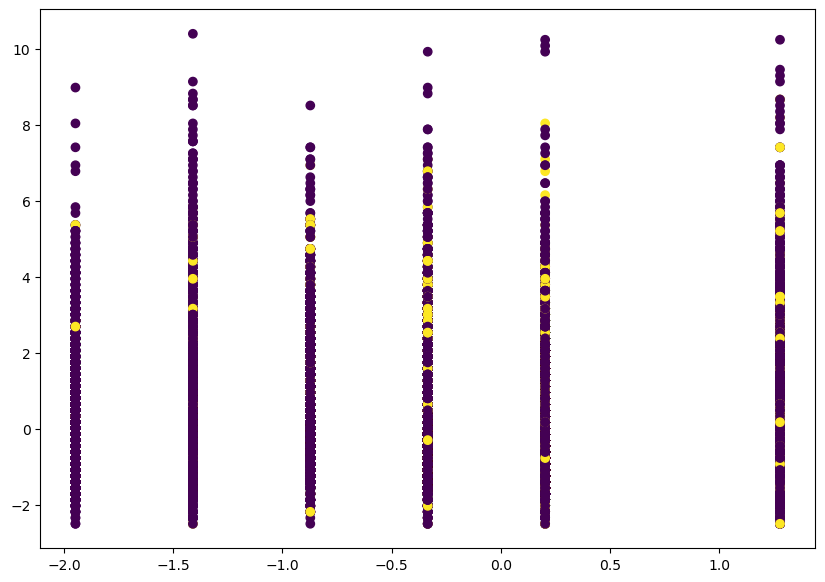

In [76]:
fig, ax = plt.subplots(figsize=(10, 7))

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)

**Step 4**: Logistic Regression


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

# printing the coefficients of tLogisticRegressionhe dependent variables in the log reg model
print(f'Coefficients of dependent variables in the Logistic Regression model: {lr.coef_}')

Coefficients of dependent variables in the Logistic Regression model: [[ 0.35349475  0.06086625  0.25642686  0.3318975  -0.11638571  0.30789711
   0.35386429  0.20911276  0.0990976 ]]


In [79]:
print(f'Binary classes of the target variables:\n{pd.Series(y).value_counts()}')
a = 292422/27373
print(f'There is around 1 in {a} people have a heart disease')


Binary classes of the target variables:
0    292422
1     27373
Name: HeartDisease, dtype: int64
There is around 1 in 10.682862674898622 people have a heart disease


In [80]:
print(f'Train set:\n{pd.Series(y_train).value_counts()}')
b = 204737/19119
print(f'There is around 1 in {b} people have a heart disease')

Train set:
0    204876
1     18980
Name: HeartDisease, dtype: int64
There is around 1 in 10.70856216329306 people have a heart disease


In [81]:
print(f'Test set:\n{pd.Series(y_test).value_counts()}')
c = 87685/8254
print(f'There is around 1 in {c} people have a heart disease')

Test set:
0    87546
1     8393
Name: HeartDisease, dtype: int64
There is around 1 in 10.623334141022534 people have a heart disease


**Step 5**: Metrics


Because there is only 1 person in  around 11 people have heart disease, we can see that the data is quite **imbalanced**. This imbalance will explain some of the metrics of the model accuracy.

In [82]:
# y_pred = the predicted output of the log reg model on the test set
y_pred = lr.predict(X_test) 

# y_true = the real values of the test set

y_true = y_test 

In [83]:
from sklearn.metrics import \
    accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix

In [84]:
print(f'Accuracy score: {accuracy_score(y_true,y_pred)}')

#true positive / (true positive + false positive) 
print(f'Precision score: {precision_score(y_true,y_pred)}') 

# true positive / (true positive + false negative)
print(f'Recall score: {recall_score(y_true,y_pred)}') 

print(f'f1 score: {f1_score(y_true,y_pred)}') 

 #f1 âm tính nhiều nên predict âm tính tốt còn dương tính kém vì imbalanced

Accuracy score: 0.9130906096582203
Precision score: 0.5286757038581856
Recall score: 0.06040748242583105
f1 score: 0.10842600513259197


**Interpretation**:
-  Based on our test set, we see that the **accuracy score is 91.47%**, which means the model **predicted very accurately** (correctly 91.47% of the time) whether a person has a heart disease based on their age, BMI, sex, whether they smoke, drink alcohol, is diabetic, had a stroke, has a kidney disease or asthma. 
- However, the **f1 score is very low**, around 10%, which is not good and this is caused by the imbalanced data. 
- More specifically, the **precision score is 53.9%**, which means among the positive results predicted, 53.9% of these people actually have a heart disease. 
- The **recall score is only 6%**, which means around 94% of people that actually have a heart disease were predicted to NOT have a heart disease. (This is backed up by the actual true/false positive/negative results from our model below, where the false negative number is very high compared to both the true/false positives)

**In general**, it can be quite dangerous to predict false negative than false positive, where a person with heart disease is predicted to NOT have it.

In [85]:
confu = confusion_matrix(y_true,y_pred)

tn, fp, fn, tp = confu.ravel()
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)



True Negative: 87094
False Positive: 452
False Negative: 7886
True Positive: 507


**Conclusion**:

- Since predicting if a person has heart disease is very important, we should see a higher recall score. 
- The recall score we observed was very low while the accuracy score was very high, which means our model is better at predicting if a person does NOT have a heart disease compared to if a person actually has a heart disease. 
- Our model's poor performance is due to **the very imbalanced dataset** and due to the fact that most of our dependent variables are categorical.

**Important Disclaimers**:
- The chosen dataset is rather imbalanced (for example, the number of people who have heart disease/kidney disease/... account for a very low percentage of the total number of participants). This affects the results and model's performance.
- The chosen dataset contains many binary variables. This affects the results and model's performance
- However, I believe that the dataset is very realistic, because:
    + 1. There cannot be too much people who have cardiovascular diseases in real life. It is normally that the majority of participants DO NOT have heart disease, as it would be a chaos if they do 🙂
    + 2. The number of participants is big: 319795.
    + 3. The dataset is extracted from a real survey in 2020.
    

# Thank you for your attention.

**And stop smoking. Tobacco kills :D**